In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns

import umap
import math

import warnings
warnings.filterwarnings('ignore')

c:\Users\Mohamed\anaconda3\envs\coursera\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Linear Model

w * x + b = 0


## Loss Function:
Hinge Loss: l = max(0,1-y(w * x + b))

## Cost function
J = C * sum(Hinge Loss)


## Gradient:
- dJ(w) = C * sum(-y_i * x_i * [1 - y_i * (w.T * x_i + b) >= 0])
- dJ(b) = C * sum(-y_i * [1 - y_i * (w.T * x_i + b) >= 0])


In [199]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, C=1.0, n_iters=1000) -> None:
        self.learning_rate = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _cost_function(self, x, y, w, b):
        return self.C * np.sum(np.maximum(0, 1 - y.reshape(-1, 1) * (np.dot(x, w.reshape(-1, 1))+ b)))
    
    def _derivative_cost_function(self, x, y, w, b):
        m, n = x.shape
        margins = np.maximum(0, 1 - y.reshape(-1, 1) * (np.dot(x, w.reshape(-1, 1)) + b))
        d_cost_w = self.C * np.sum(-y.reshape(-1, 1) * x * (margins > 0), axis=0)
        d_cost_b = -self.C * np.sum(y.reshape(-1, 1) * (margins > 0))

        return d_cost_w, d_cost_b
    
    def fit(self, X, y):
        y_ = np.where(y<=0, -1, 1)
        m, n = X.shape
        self.w = np.zeros((n,))
        self.b = 0

        learning_curve = []
        w_history = []

        for i in range(self.n_iters):
            d_cost_w, d_cost_b = self._derivative_cost_function(X, y_, self.w, self.b)
            self.w = self.w - self.learning_rate * d_cost_w
            self.b = self.b - self.learning_rate * d_cost_b

            learning_curve.append(self._cost_function(X, y_, self.w, self.b))

            # Print cost every at intervals 10 times or as many iterations if < 10
            if i% math.ceil(self.n_iters/10) == 0 or i == (self.n_iters-1):
                w_history.append(self.w)
                print(f"Iteration {i:4}: Cost {float(learning_curve[-1]):8.2f}, w {self.w if n==2 else None}, b {self.b}")

        return self.w, self.b, learning_curve, w_history

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)
    
def normalize(x):
    return (x - x.mean(axis=0)) / (x.std(axis=0) + 1e-8)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

def visualize_svm(X, y, clf):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        plt.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])


def plot_results(X, y, learning_curve, clf):
    plt.figure(figsize = (24,6))

    plt.subplot(1,2,1)
    sns.lineplot(x=np.arange(len(learning_curve)),y=learning_curve)
    plt.title('Learning Curve', fontsize = 20)


    plt.subplot(1,2,2)
    visualize_svm(X, y, clf)

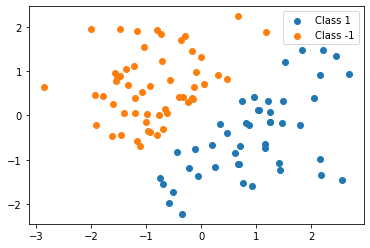

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data with two classes
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.sign(X[:, 0] - X[:, 1])  # linearly separable

# Add some margin to the data
margin = 0.3
X[y == 1, 0] += margin
X[y == -1, 0] -= margin

# Plot the data
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1")
plt.scatter(X[y==-1, 0], X[y==-1, 1], label="Class -1")
plt.legend()
plt.show()


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.3, random_state = 31)

In [176]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [203]:
learning_rate = 0.001
C = 1.0
n_iters = 500

svm = LinearSVM(learning_rate, C, n_iters)
w, b, learning_curve, history_f_function = svm.fit(X_train, y_train)

Iteration    0: Cost    65.43, w [ 0.04917345 -0.04597417], b -0.006
Iteration   50: Cost     9.02, w [ 1.09338265 -0.97742074], b -0.13300000000000003
Iteration  100: Cost     4.29, w [ 1.394262   -1.31379761], b -0.29400000000000015
Iteration  150: Cost     2.86, w [ 1.60623991 -1.45342857], b -0.3700000000000002
Iteration  200: Cost     2.36, w [ 1.72447979 -1.53634649], b -0.42100000000000026
Iteration  250: Cost     2.06, w [ 1.8144815  -1.61685931], b -0.41500000000000026
Iteration  300: Cost     1.77, w [ 1.89457853 -1.70378229], b -0.39600000000000024
Iteration  350: Cost     1.55, w [ 1.97793783 -1.7627187 ], b -0.38600000000000023
Iteration  400: Cost     1.39, w [ 2.06185098 -1.791072  ], b -0.3720000000000002
Iteration  450: Cost     1.23, w [ 2.14499854 -1.81708122], b -0.3520000000000002
Iteration  499: Cost     1.08, w [ 2.22602841 -1.83314955], b -0.3350000000000002


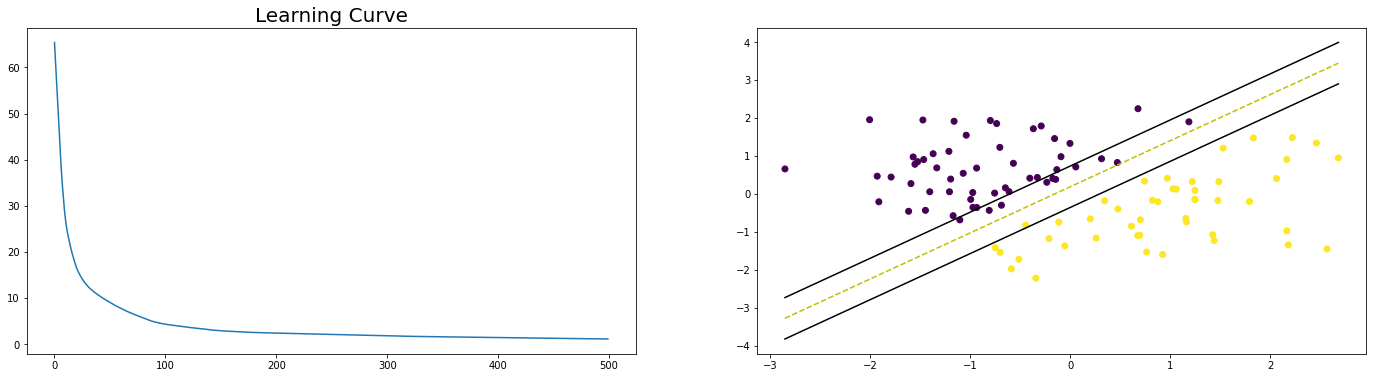

In [204]:
plot_results(X, y, learning_curve, svm)

In [205]:
y_hat = svm.predict(X_train)
accuracy(y_train, y_hat)

1.0

In [206]:
y_hat = svm.predict(X_test)
accuracy(y_test, y_hat)

1.0